In [1]:
import numpy as np
from numpy import cos, sin, arctan2 as atan, sqrt, pi as π, sign, log
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.spatial.transform import Rotation
from scipy.integrate import quad
from scipy.special import ellipk as ellK,  ellipe as ellE
from scipy.special import ellipkinc as ellK_inc,  ellipeinc as ellE_inc
from scipy.constants import mu_0 as μ0

import pycoilib as pycoil
from pycoilib.inductance import calc_M_2arcs
from pycoilib.shape import Arc, Line, Circle

plt.rc('xtick',labelsize=8)
plt.rc('ytick',labelsize=8)
plt.rc('lines', linewidth=2)
plt.rc('font', size=9)

vec_x=np.array([1.,0.,0.])
vec_y=np.array([0.,1.,0.])
vec_z=np.array([0.,0.,1.])
vec_0=np.array([0.,0.,0.])

ModuleNotFoundError: No module named 'pycoilib.inductance'

# Calcul de l'inductance

In [2]:
ell = 0.10
a = 0.001
θ = np.linspace(0.,2*π, round(360/5+1) )


wire = pycoil.wire.WireCircular(a)

I = []

# Premier cas : line
line = Line(np.array([0.,0.,0.]), np.array([0.,0.,ell]))
coil = pycoil.coil.Coil([line], wire)
I.append(coil.calc_I())

# Premier line : arc
for θ_i in θ[1:]:
    R = ell/θ_i
    arc = Arc.from_center(vec_0, R=R, arc_angle=θ_i, arc_rot=0)
    coil = pycoil.coil.Coil([arc], wire)
    I.append( coil.calc_I() )
I = np.array(I)

loop = Circle(R)
I_loop = pycoil.coil.Coil([loop], wire).calc_I()
I_line = I[0]

NameError: name 'Line' is not defined

# Affichage

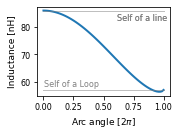

In [3]:

fig = plt.figure(figsize=(6.5/2.54, 5./2.54))
ax = plt.gca()

plt.plot(θ/(2*π), I/1e-9, )
plt.plot(θ/(2*π), I**0*I_line/1e-9, "gray",lw=1, alpha=0.5)
plt.plot(θ/(2*π), I**0*I_loop/1e-9, "gray",lw=1, alpha=0.5)

#ax.set_ylim([55,90])
ax.set_xlabel(r"Arc angle [$2\pi$]")
ax.set_ylabel(r"Inductance [nH]")

props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax.text(0.05, 0.18, r"Self of a Circle", transform=ax.transAxes, fontsize=8,
        verticalalignment='top', c="gray")

ax.text(0.60, 0.92, r"Self of a line", transform=ax.transAxes, fontsize=8,
        verticalalignment='top',c="gray" )

ax.text(0.60, 0.92, r"Self of a line", transform=ax.transAxes, fontsize=8,
        verticalalignment='top',c="gray" )


fig.tight_layout()
fig.savefig("Appli-fil-courbe.png", dpi=300)
plt.show()

In [ ]:
T = [1/8, 3/4, ]